<a href="https://colab.research.google.com/github/lovelessbhartal12/Deeplearning-codeplaces/blob/main/vanshing_gradient_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=250,noise=0.05,random_state=2)

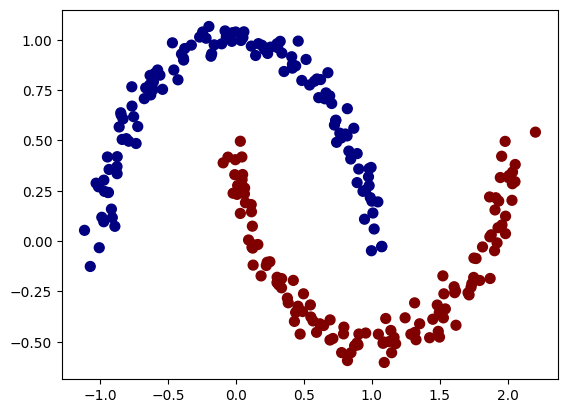

In [6]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='jet')

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [21]:
model=Sequential()
model.add(Dense(10,activation='sigmoid',input_shape=(2,)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701 (2.74 KB)

 Trainable params: 701 (2.74 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
old_weight=model.get_weights()[0]

In [25]:
old_weight

array([[-0.26034614, -0.34064987, -0.084934  ,  0.3519724 ,  0.07349688,
        -0.37953895,  0.7021881 , -0.32822075, -0.09321755, -0.3892359 ],
       [ 0.70275635, -0.68335754, -0.13703996,  0.33282107,  0.32227045,
         0.415605  , -0.6968929 ,  0.47713   , -0.06073767,  0.36965472]],
      dtype=float32)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [28]:
model.fit(x_train,y_train, epochs=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4571 - loss: 0.7285


In [30]:
new_weight=model.get_weights()[0]

In [31]:
model.optimizer.get_config()['learning_rate']

0.0010000000474974513

In [32]:
grad=(old_weight-new_weight)/0.001

In [36]:
percentage=abs(100*((old_weight-new_weight)/old_weight))

In [37]:
grad

array([[ 0.16039608,  0.08279084, -1.161985  , -1.6437768 , -3.335677  ,
         2.759665  ,  1.3387202 , -0.53191185, -1.1588782 ,  2.4395287 ],
       [ 0.07450581, -0.06556511,  1.3453959 ,  2.0081103 ,  3.7051735 ,
        -3.2351015 , -1.879692  ,  0.73808426,  1.349613  , -2.8784869 ]],
      dtype=float32)

In [38]:
percentage

array([[0.06160879, 0.0243038 , 1.3681036 , 0.4670187 , 4.538529  ,
        0.7271099 , 0.19064982, 0.16205917, 1.2431974 , 0.6267481 ],
       [0.01060194, 0.00959455, 0.98175454, 0.6033603 , 1.1497095 ,
        0.7784078 , 0.26972467, 0.1546925 , 2.2220364 , 0.7786962 ]],
      dtype=float32)

In [39]:
old_weight

array([[-0.26034614, -0.34064987, -0.084934  ,  0.3519724 ,  0.07349688,
        -0.37953895,  0.7021881 , -0.32822075, -0.09321755, -0.3892359 ],
       [ 0.70275635, -0.68335754, -0.13703996,  0.33282107,  0.32227045,
         0.415605  , -0.6968929 ,  0.47713   , -0.06073767,  0.36965472]],
      dtype=float32)

In [40]:
new_weigh

array([[-0.26050654, -0.34073266, -0.08377201,  0.35361618,  0.07683256,
        -0.38229862,  0.70084935, -0.32768884, -0.09205867, -0.39167544],
       [ 0.70268184, -0.683292  , -0.13838536,  0.33081296,  0.31856528,
         0.4188401 , -0.6950132 ,  0.4763919 , -0.06208728,  0.3725332 ]],
      dtype=float32)